In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('data/top_agencies_clean.csv')

display(df.head())
df.shape

,Unnamed: 0,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,address_type,status,resolution_description,community_board,borough,open_data_channel_type,location,new_zip,Unnamed: 0.1,total_population,median_income,median_age,minority_rep,hs_or_above,bach_or_above,poverty_rate,unemployment_rate
0,0,2017-07-09 23:26:34,2017-07-10 01:55:52,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,ADDRESS,Closed,The Police Department responded to the complai...,17 BROOKLYN,BROOKLYN,MOBILE,"(40.65087119116162, -73.93997156019773)",11203,"ZCTA5 11203: Summary level: 860, zip code tabu...",75451,30301,39.8,0.961816,0.786099,0.234683,0.147213,0.064832
1,1,2017-07-09 23:11:08,2017-07-10 07:36:59,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,ADDRESS,Closed,The Police Department responded to the complai...,11 BRONX,BRONX,PHONE,"(40.85829772629949, -73.85445497857519)",10469,"ZCTA5 10469: Summary level: 860, zip code tabu...",73870,29338,40.2,0.892961,0.705336,0.249883,0.134557,0.087722
2,2,2017-07-09 23:15:39,2017-07-10 03:14:15,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,ADDRESS,Closed,The Police Department responded to the complai...,06 BRONX,BRONX,PHONE,"(40.856369402043434, -73.89027597242314)",10458,"ZCTA5 10458: Summary level: 860, zip code tabu...",83960,17907,29.0,0.916687,0.614682,0.143008,0.313134,0.132113
3,3,2017-07-09 20:12:26,2017-07-09 20:33:15,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,ADDRESS,Closed,The Police Department responded to the complai...,09 MANHATTAN,MANHATTAN,ONLINE,"(40.82104731868181, -73.95526006866052)",10031,"ZCTA5 10031: Summary level: 860, zip code tabu...",60254,25155,34.2,0.825987,0.699188,0.359176,0.210074,0.068703
4,4,2017-07-09 13:31:16,2017-07-09 17:44:29,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,ADDRESS,Closed,The Police Department responded to the complai...,02 QUEENS,QUEENS,ONLINE,"(40.74024808519835, -73.92024203568081)",11377,"ZCTA5 11377: Summary level: 860, zip code tabu...",86421,30227,40.0,0.790479,0.703111,0.286637,0.107048,0.040060


(15492091, 25)

In [3]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15492091 entries, 0 to 15492090
Data columns (total 23 columns):
created_date              object
closed_date               object
agency                    object
agency_name               object
complaint_type            object
descriptor                object
location_type             object
address_type              object
status                    object
resolution_description    object
community_board           object
borough                   object
open_data_channel_type    object
location                  object
new_zip                   int64
total_population          int64
median_income             int64
median_age                float64
minority_rep              float64
hs_or_above               float64
bach_or_above             float64
poverty_rate              float64
unemployment_rate         float64
dtypes: float64(6), int64(3), object(14)
memory usage: 2.7+ GB


### Convert data types

In [5]:
df.created_date = pd.to_datetime(df.created_date)
df.closed_date = pd.to_datetime(df.closed_date)
df.new_zip = df.new_zip.astype('str')

In [25]:
df['created_day_o_wk'] = df.created_date.dt.dayofweek
df['created_month'] = df.created_date.dt.month
df['created_day_o_yr'] = df.created_date.dt.dayofyear
df['created_yr'] = df.created_date.dt.year

df.head()

,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,address_type,status,resolution_description,community_board,borough,open_data_channel_type,location,new_zip,total_population,median_income,median_age,minority_rep,hs_or_above,bach_or_above,poverty_rate,unemployment_rate,response_time,created_day_o_wk,created_month,created_day_o_yr,created_yr
0,2017-07-09 23:26:34,2017-07-10 01:55:52,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,ADDRESS,Closed,The Police Department responded to the complai...,17 BROOKLYN,BROOKLYN,MOBILE,"(40.65087119116162, -73.93997156019773)",11203,75451,30301,39.8,0.961816,0.786099,0.234683,0.147213,0.064832,0.103681,6,7,190,2017
1,2017-07-09 23:11:08,2017-07-10 07:36:59,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,ADDRESS,Closed,The Police Department responded to the complai...,11 BRONX,BRONX,PHONE,"(40.85829772629949, -73.85445497857519)",10469,73870,29338,40.2,0.892961,0.705336,0.249883,0.134557,0.087722,0.351285,6,7,190,2017
2,2017-07-09 23:15:39,2017-07-10 03:14:15,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,ADDRESS,Closed,The Police Department responded to the complai...,06 BRONX,BRONX,PHONE,"(40.856369402043434, -73.89027597242314)",10458,83960,17907,29.0,0.916687,0.614682,0.143008,0.313134,0.132113,0.165694,6,7,190,2017
3,2017-07-09 20:12:26,2017-07-09 20:33:15,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,ADDRESS,Closed,The Police Department responded to the complai...,09 MANHATTAN,MANHATTAN,ONLINE,"(40.82104731868181, -73.95526006866052)",10031,60254,25155,34.2,0.825987,0.699188,0.359176,0.210074,0.068703,0.014456,6,7,190,2017
4,2017-07-09 13:31:16,2017-07-09 17:44:29,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,ADDRESS,Closed,The Police Department responded to the complai...,02 QUEENS,QUEENS,ONLINE,"(40.74024808519835, -73.92024203568081)",11377,86421,30227,40.0,0.790479,0.703111,0.286637,0.107048,0.040060,0.175845,6,7,190,2017


In [7]:
# ax = sns.countplot(x='complaint_type', hue='agency', data=df)

# Agency

## complaint type

In [6]:
agencies = list(set(df.agency.values))

In [7]:
counts = []
for col in df.columns:
    c = df[col].nunique()
    counts.append(c)

variable_counts = pd.DataFrame({'variable': df.columns.values, 
                                'unique values': counts})

variable_counts

,variable,unique values
0,created_date,10125388
1,closed_date,6536442
2,agency,8
3,agency_name,52
4,complaint_type,30
5,descriptor,422
6,location_type,75
7,address_type,5
8,status,7
9,resolution_description,822


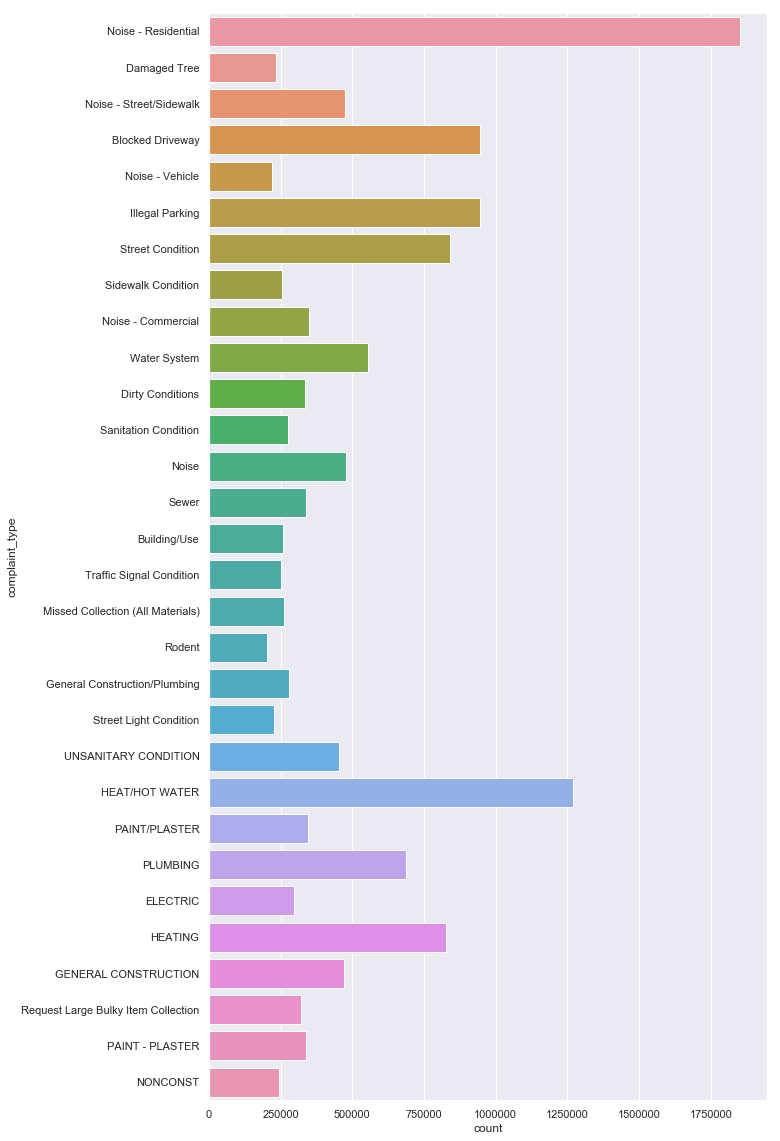

In [14]:
ax = plt.figure(figsize=(10,20))
ax = sns.countplot(y='complaint_type', data=df)

In [11]:
# for col in df.columns:
#     print(col,': ')
#     print(df[col].nunique())
#     print('-----' * 10)

In [10]:
df.groupby('agency').complaint_type.agg(['value_counts'])

value_counts
agency complaint_type                                   
DEP    Water System                               555543
       Noise                                      476529
       Sewer                                      339798
DOB    General Construction/Plumbing              280387
       Building/Use                               257281
       Traffic Signal Condition                        1
DOHMH  Rodent                                     201338
       Traffic Signal Condition                        1
DOT    Street Condition                           840345
       Sidewalk Condition                         254080
       Traffic Signal Condition                   252284
       Street Light Condition                     226003
DPR    Damaged Tree                               235364
DSNY   Dirty Conditions                           336015
       Request Large Bulky Item Collection        319916
       Sanitation Condition                       275139
       Missed Collection (All Materials)          260647
HPD    HEAT/HOT WATER                            1268973
       HEATING                                    826222
       PLUMBING                                   686057
       GENERAL CONSTRUCTION                       470189
       UNSANITARY CONDITION                       453227
       PAINT/PLASTER                              346239
       PAINT - PLASTER                            338834
       ELECTRIC                                   297310
       NONCONST                                   245541
NYPD   Noise - Residential                       1853643
       Illegal Parking                            945587
       Blocked Driveway                           944757
       Noise - Street/Sidewalk                    475330
       Noise - Commercial                         350447
       Noise - Vehicle                            220652
       Sidewalk Condition                              9
       Street Condition                                3

# Response Time

In [8]:
df['response_time'] = df.closed_date - df.created_date
df['response_time'] = df['response_time'] / np.timedelta64(1,'D')
df = df[df['response_time'] > 0]

df.head()

,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,address_type,status,resolution_description,community_board,borough,open_data_channel_type,location,new_zip,total_population,median_income,median_age,minority_rep,hs_or_above,bach_or_above,poverty_rate,unemployment_rate,response_time
0,2017-07-09 23:26:34,2017-07-10 01:55:52,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,ADDRESS,Closed,The Police Department responded to the complai...,17 BROOKLYN,BROOKLYN,MOBILE,"(40.65087119116162, -73.93997156019773)",11203,75451,30301,39.8,0.961816,0.786099,0.234683,0.147213,0.064832,0.103681
1,2017-07-09 23:11:08,2017-07-10 07:36:59,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,ADDRESS,Closed,The Police Department responded to the complai...,11 BRONX,BRONX,PHONE,"(40.85829772629949, -73.85445497857519)",10469,73870,29338,40.2,0.892961,0.705336,0.249883,0.134557,0.087722,0.351285
2,2017-07-09 23:15:39,2017-07-10 03:14:15,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,ADDRESS,Closed,The Police Department responded to the complai...,06 BRONX,BRONX,PHONE,"(40.856369402043434, -73.89027597242314)",10458,83960,17907,29.0,0.916687,0.614682,0.143008,0.313134,0.132113,0.165694
3,2017-07-09 20:12:26,2017-07-09 20:33:15,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,ADDRESS,Closed,The Police Department responded to the complai...,09 MANHATTAN,MANHATTAN,ONLINE,"(40.82104731868181, -73.95526006866052)",10031,60254,25155,34.2,0.825987,0.699188,0.359176,0.210074,0.068703,0.014456
4,2017-07-09 13:31:16,2017-07-09 17:44:29,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,ADDRESS,Closed,The Police Department responded to the complai...,02 QUEENS,QUEENS,ONLINE,"(40.74024808519835, -73.92024203568081)",11377,86421,30227,40.0,0.790479,0.703111,0.286637,0.107048,0.040060,0.175845


In [15]:
avg_response_by_complaint = df.groupby('complaint_type').response_time.agg(['mean'])
avg_response_by_complaint

,mean
complaint_type,
Blocked Driveway,0.232859
Building/Use,124.625270
Damaged Tree,49.194355
Dirty Conditions,4.500775
ELECTRIC,16.929697
GENERAL CONSTRUCTION,14.861826
General Construction/Plumbing,75.069243
HEAT/HOT WATER,3.080295
HEATING,4.009965


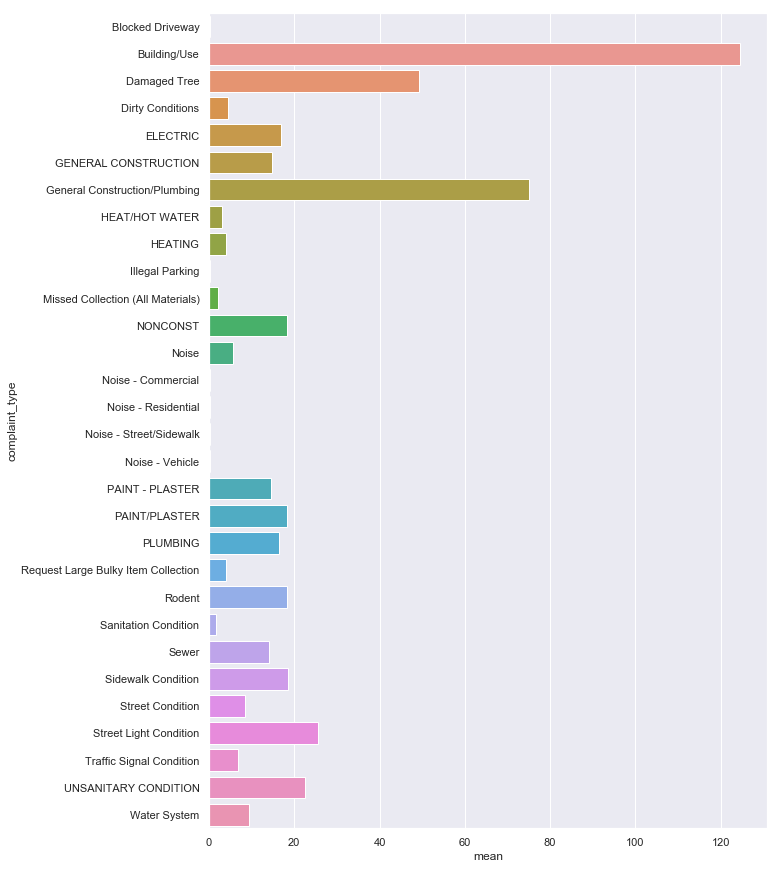

In [23]:
ax = plt.figure(figsize=(10,15))
ax = sns.barplot(y=avg_response_by_complaint.index, x='mean', data=avg_response_by_complaint)

In [14]:
df.groupby('complaint_type').response_time.agg(['min', 'max', 'mean'])

,min,max,mean
complaint_type,,,
AGENCY,15.750093,28.000000,19.521778
APPLIANCE,0.006227,1908.618553,20.883097
ATF,0.011806,1582.650694,112.355890
Abandoned Vehicle,0.000324,114.278831,1.154618
Adopt-A-Basket,0.009722,26.150694,3.048510
Air Quality,0.000694,369.072222,4.653815
Animal Abuse,0.001493,49.914074,0.228850
Animal-Abuse,0.000509,52.899525,0.443454
Appliance,15.081516,33.920162,24.500839


In [9]:
# df.open_data_channel_type.value_counts(dropna=False)

PHONE      9383110
UNKNOWN    4384748
ONLINE     3022363
MOBILE     1264502
OTHER       184333
Name: open_data_channel_type, dtype: int64

In [ ]:
# print(df[df['complaint_type'] == 'Noise - Residential'].descriptor.value_counts())


In [ ]:
# for a in agencies:
#     print(a,': ')
#     print(df[df['agency'] == a].complaint_type.value_counts())
#     print('----' * 10)

In [ ]:
# for a in agencies:
#     print(a,': ')
#     print(df[df['agency'] == a].location_type.value_counts(dropna=False))
#     print('----' * 10, '\n')

In [ ]:
# df.status.value_counts(dropna=False)

In [ ]:
# df.open_data_channel_type.value_counts(dropna=False)

In [ ]:
# df.location_type.value_counts(dropna=False)